<a href="https://colab.research.google.com/github/haiderAli62/Google-Stock_price-pridiction-RNN/blob/master/RecurrentNeuralNetwork_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent Neural Network **

---

In this notebook we are going to create a recurrent neural network by applying  lstm model to predict time series of google stock prices 
lets start.

In [0]:
#part 1 : Data preprocessig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#improting the trainning set
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
import io
training_set = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [0]:
training_set = training_set.iloc[:,1:2].values

In [0]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [0]:
# getting the inputs and the outputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [0]:
# resahpe because LStm fit method accept 3d array and it is 2d
X_train = np.reshape(X_train , (1257 , 1 ,1 ))

**Part II : Building the model**

In [17]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
# Innitializing the RNN
regressor = Sequential()
regressor.add(LSTM(units = 4 , activation = 'sigmoid' , input_shape =(None , 1)))   # adding the input and the lstm layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# compiling the rnn
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [21]:
# training
regressor.fit(X_train ,y_train , batch_size = 32 ,epochs = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1257/1257 [==============================] - 1s 951us/step - loss: 0.2213
Epoch 2/200
1257/1257 [==============================] - 0s 78us/step - loss: 0.1575
Epoch 3/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.1178
Epoch 4/200
1257/1257 [==============================] - 0s 85us/step - loss: 0.0954
Epoch 5/200
1257/1257 [==============================] - 0s 73us/step - loss: 0.0839
Epoch 6/200
1257/1257 [==============================] - 0s 75us/step - loss: 0.0782
Epoch 7/200
1257/1257 [==============================] - 0s 77us/step - loss: 0.0753
Epoch 8/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0735
Epoch 9/200
1257/1257 [==============================] - 0s 75us/step - loss: 0.0721
Epoch 10/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.0707
Epoch 11/200
1257/1257 [==============================] - 0s 69us/step - loss: 0.0694
Epoch 12/200
1

**Part III : making predictions and visullize the resluts**

In [27]:
#improting the test set
from google.colab import files
uploaded = files.upload()


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [0]:
import io
test_set = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))


In [0]:
real_stock_price = test_set.iloc[:,1:2].values


In [0]:
# getting the predicted stockprices of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs , (20 , 1 ,1))
predicted_stock_prices = regressor.predict(inputs)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

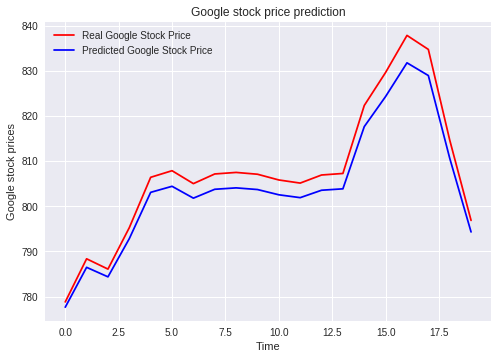

In [38]:
# visulizing the results
plt.plot(real_stock_price , color = "red" , label = 'Real Google Stock Price')
plt.plot(predicted_stock_prices , color = "blue" , label = 'Predicted Google Stock Price')
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock prices")
plt.legend()
plt.show()

**Part IV : Evaluate the model**

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price , predicted_stock_prices))

In [53]:
rmse/800

0.004585434504728267